In [23]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [24]:
tlx = pd.read_csv('/Users/amina/tlxwork/tlxresponses.csv')
tlx_1 = tlx[tlx['Which part of the study are you doing?'] == 'Part 1']
tlx_2 = tlx[tlx['Which part of the study are you doing?'] == 'Part 2']

In [27]:
tlx_1

,Participant Number,How mentally demanding was the task?,How physically demanding was the task?,How hurried or rushed was the pace of the task?,How successful were you in accomplishing what you were asked to do?,How hard did you have to work to accomplish your level of performance?,"How insecure, discouraged, irritated, stressed and annoyed were you?",Cluster
0,1,6,1,3,6,4,3,0
2,2,2,1,2,6,4,1,0
4,3,5,2,3,5,3,1,0
6,4,6,2,4,6,3,2,0
8,5,1,1,3,7,2,1,1
10,6,4,1,1,4,3,2,0


In [25]:
tlx_1 = tlx_1.drop(columns=['Timestamp', 'Which part of the study are you doing?'])
tlx_2 = tlx_2.drop(columns=['Timestamp', 'Which part of the study are you doing?'])

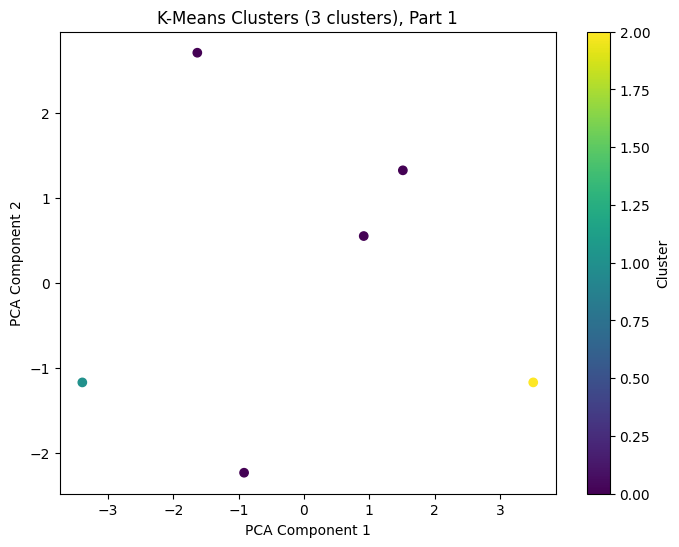

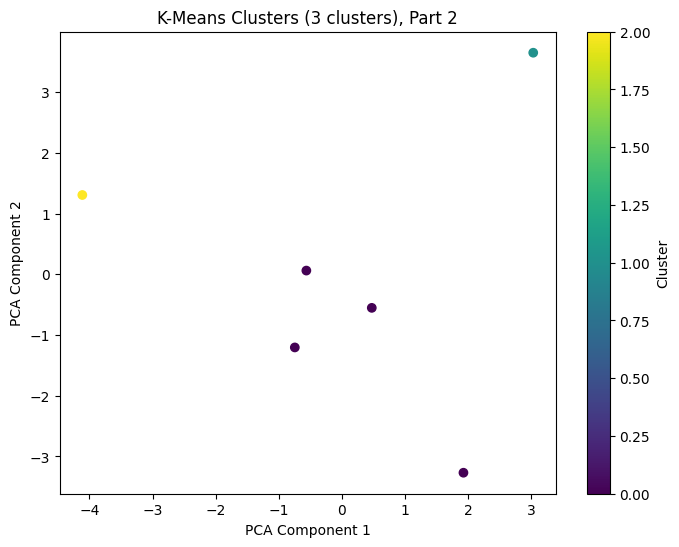

Cluster assignments for tlx_1:
    Participant Number  Cluster
0                    1        2
2                    2        0
4                    3        0
6                    4        0
8                    5        1
10                   6        0

Cluster assignments for tlx_2:
    Participant Number  Cluster
1                    1        2
3                    2        0
5                    3        0
7                    4        0
9                    5        0
11                   6        1


In [30]:

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(tlx_1.dropna()) 

tlx_1['Cluster'] = kmeans.labels_  

pca = PCA(n_components=2)
tlx_1_pca = pca.fit_transform(tlx_1.dropna())

plt.figure(figsize=(8, 6))
plt.scatter(tlx_1_pca[:, 0], tlx_1_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clusters (3 clusters), Part 1')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(tlx_2.dropna())  

tlx_2['Cluster'] = kmeans.labels_ 


pca = PCA(n_components=2)
tlx_2_pca = pca.fit_transform(tlx_2.dropna())


plt.figure(figsize=(8, 6))
plt.scatter(tlx_2_pca[:, 0], tlx_2_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('K-Means Clusters (3 clusters), Part 2')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.show()

print("Cluster assignments for tlx_1:")
print(tlx_1[['Participant Number', 'Cluster']])


print("\nCluster assignments for tlx_2:")
print(tlx_2[['Participant Number', 'Cluster']])